# Chances Conceded: Is it really that bad?

Why the "Big Chances Conceded" stat without context is

Using the example of Barcelona: "12 big chances conceded in 3 games" sounds terrible... until you analize the data that they won't show you.

In [48]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import soccerdata as sd
from IPython.core.pylabtools import figsize
from PIL.ImageTk import getimage
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from pandas import read_csv
from statsbombpy.api_client import team_season_stats
from PIL import ImageTk, Image

pd.set_option('display.max_columns', None)

In [49]:
# Creando un DataFrame desde un CSV DataSet
df_sca = pd.read_csv("SCA_LaLiga.csv")
df_gls = pd.read_csv("LaLiga_Shooting.csv")

In [50]:
df_combined = pd.merge(df_sca[['Squad', 'SCA']], df_gls[['Squad', 'Gls']], on='Squad')

In [51]:
# Cambiamos los nombres para que coincidan con los nombres de las imagenes
df_combined.Squad = df_combined.Squad.replace({
 'Alavés': 'Deportivo Alavés',
 'Athletic Club': 'Athletic Bilbao',
 'Atlético Madrid': 'Atlético de Madrid',
 'Barcelona': 'FC Barcelona',
 'Betis': 'Real Betis Balompié',
 'Celta Vigo': 'Celta de Vigo',
 'Elche': 'Elche CF',
 'Espanyol': 'RCD Espanyol Barcelona',
 'Getafe': 'Getafe CF',
 'Girona': 'Girona FC',
 'Levante': 'Levante UD',
 'Mallorca': 'RCD Mallorca',
 'Osasuna': 'CA Osasuna',
 'Oviedo': 'Real Oviedo',
 'Rayo Vallecano': 'Rayo Vallecano',
 'Real Madrid': 'Real Madrid',
 'Real Sociedad': 'Real Sociedad',
 'Sevilla': 'Sevilla FC',
 'Valencia': 'Valencia CF',
 'Villarreal': 'Villarreal CF'
}).sort_values()

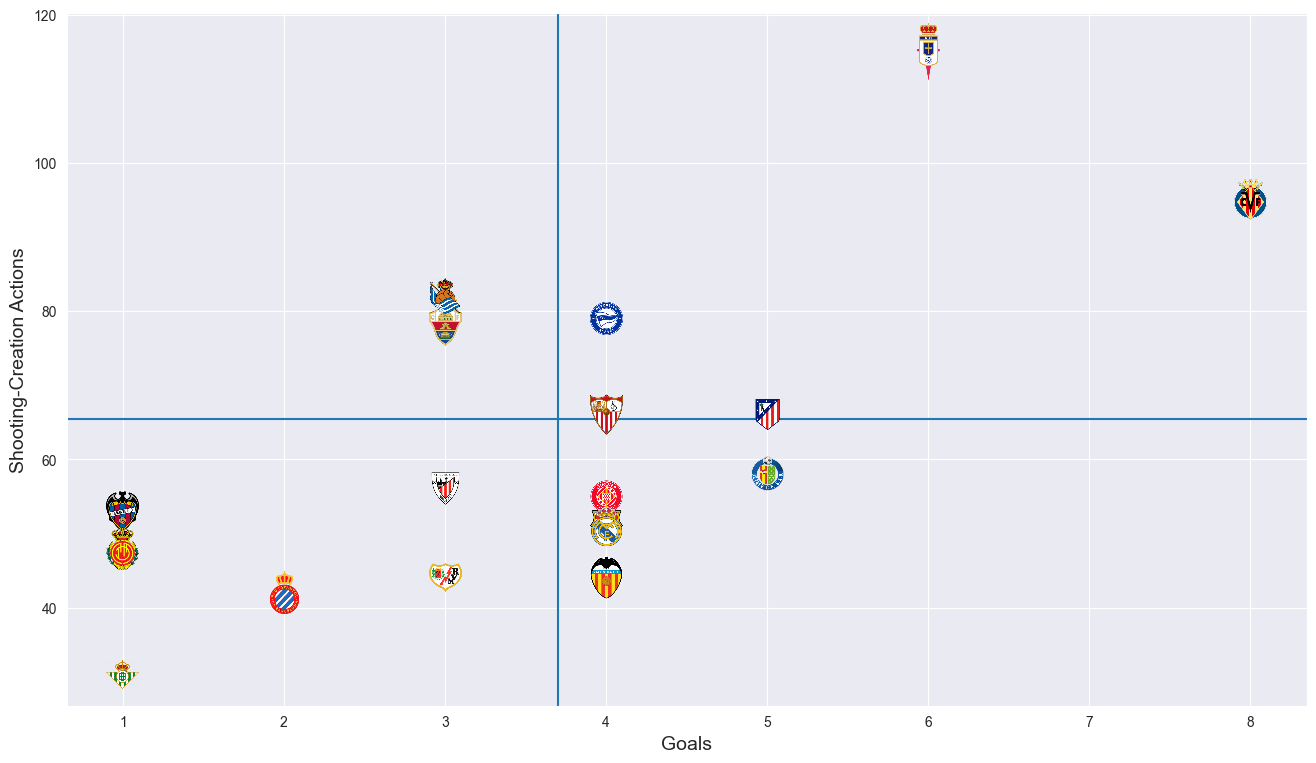

In [52]:
x = df_combined['Gls']
y = df_combined['SCA']

# Media de Goles y SCA
promx = x.mean()
promy = y.mean()

fig, ax = plt.subplots(figsize=(16,9))

ax.scatter(x,y)

ax.axhline(promy)
ax.axvline(promx)

nameXAxis = "Goals"
nameYAxis = "Shooting-Creation Actions"

ax.set_xlabel(nameXAxis, size=14)
ax.set_ylabel(nameYAxis, size=14)

# Funcion para imagenes
def getImage(path, zoom=0.17):
    return OffsetImage(plt.imread(path), zoom=zoom)

# Logos de los clubes
import os
files = os.listdir("./assets/Spain - LaLiga")

for x0, y0, file in zip(x, y, files):
    ab = AnnotationBbox(getImage(f"C:/Users/davo2/OneDrive/Documentos/Code/FCPython/assets/Spain - LaLiga/{file}"), (x0,y0), frameon=False)
    ax.add_artist(ab)